In [3]:
% matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

In [4]:
# SVG是一种无损格式 – 意味着它在压缩时不会丢失任何数据，可以呈现无限数量的颜色。
# SVG最常用于网络上的图形、徽标可供其他高分辨率屏幕上查看。
d2l.use_svg_display()  # 使用svg来显示图片，这样清晰度高一些。

In [5]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST", train=True, transform=trans,
                                                download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST", train=False, transform=trans,
                                               download=True)
print(len(mnist_train))
print(len(mnist_test))

60000
10000


In [6]:
print(mnist_train[0][0].shape)  # 黑白图片，所以channel为1。
print(mnist_train[0][1])  # [0][0]表示第一个样本的图片信息，[0][1]表示该样本对应的标签值

torch.Size([1, 28, 28])
9


In [7]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [8]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)  # 传进来的图像尺寸，scale 为放缩比例因子
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    print(_)
    print(axes)  # axes 为构建的两行九列的画布
    axes = axes.flatten()
    print(axes)  # axes 变成一维数据
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if (i < 1):
            print("i:", i)
            print("ax,img:", ax, img)
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
            ax.set_title(titles[i])
        else:
            # PIL图片
            ax.imshow(img)

Figure(1500x450)
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
  <AxesSubplot:> <AxesSubplot:>]]
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]
i: 0
ax,img: AxesSubplot(0.125,0.653529;0.065678x0.2

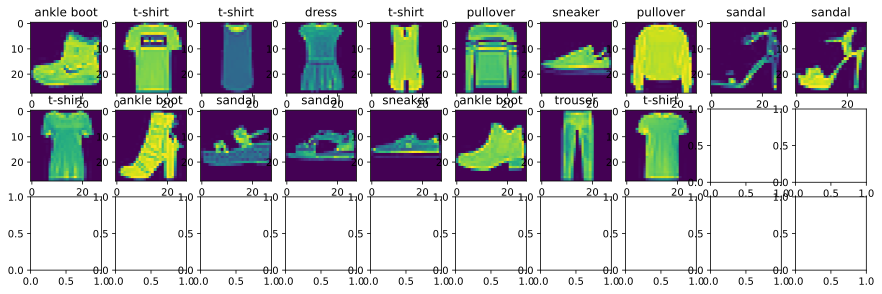

In [9]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))  # X，y 为仅抽取一次的18个样本的图片、以及对应的标签值
show_images(X.reshape(18, 28, 28), 3, 10, titles=get_fashion_mnist_labels(y))

In [10]:
batch_size = 256


def get_dataloader_workers():
    # 使用4个进程来读取数据
    return 4

In [11]:
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

In [12]:
timer = d2l.Timer()  # 计时器对象实例化，开始计时
for X, y in train_iter:  # 遍历一个batch_size数据的时间
    continue
f'{timer.stop():.2f}sec'  # 计时器停止时，停止与开始的时间间隔事件

'2.67sec'

In [13]:
def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST", train=True, transform=trans,
                                                    download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="01_data/01_DataSet_FashionMNIST", train=False, transform=trans,
                                                   download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()))

In [14]:
# softmax自定义

In [15]:
from IPython import display

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)  # 返回训练集、测试集的迭代器

In [16]:
num_inputs = 784
num_outputs = 10
w = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)
print(w.shape)
print(b.shape)

torch.Size([784, 10])
torch.Size([10])


In [18]:
def softmax(X):
    X_exp = torch.exp(X)  # 每个都进行指数运算
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

In [19]:
# 实现softmax回归模型
print(w.shape[0])


def net(X):
    return softmax(torch.matmul(X.reshape((-1, w.shape[0])), w) + b)  # -1为默认的批量大小，表示有多少个图片，每个图片用一维的784列个元素表示

784


In [20]:
# 实现交叉熵损失函数
y = torch.tensor([0, 2])  # 标号索引
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])  # 两个样本在3个类别的预测概率
y_hat[[0, 1], y]  # 把第0个样本对应标号的预测值拿出来、第1个样本对应标号的预测值拿出来

tensor([0.1000, 0.5000])

In [21]:
def cross_entropy(y_hat, y):
    print(list(range(len(y_hat))))
    return -torch.log(y_hat[range(len(y_hat)), y])


cross_entropy(y_hat, y)

[0, 1]


tensor([2.3026, 0.6931])

In [22]:
# 准确率
def accuracy(y_hat, y):
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:  # y_hat.shape[1]>1表示不止一个类别，每个类别有各自的概率
        y_hat = y_hat.argmax(axis=1)  # y_hat.argmax(axis=1)为求行最大值的索引
        print("y_hat:", y_hat)
        cmp = y_hat.type(y.dtype) == y  # 先判断逻辑运算符==，再赋值给cmp，cmp为布尔类型的数据
        print("cmp:", cmp)
    return float(cmp.type(y.dtype).sum())  # 获得y.dtype的类型作为传入参数，将cmp的类型转为y的类型（int型），然后再求和

In [23]:
print("accuracy(y_hat,y) / len(y):", accuracy(y_hat, y) / len(y))
print("accuracy(y_hat,y):", accuracy(y_hat, y))
print("len(y):", len(y))

y_hat: tensor([2, 2])
cmp: tensor([False,  True])
accuracy(y_hat,y) / len(y): 0.5
y_hat: tensor([2, 2])
cmp: tensor([False,  True])
accuracy(y_hat,y): 1.0
len(y): 2


In [24]:
# Accumulator实例中创建了2个变量，用于分别存储正确预测的数量和预测的总数量
class Accumulator:
    """在n个变量上累加"""

    def __init__(self, n):
        self.data = [0, 0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]  # zip函数把两个列表第一个位置元素打包、第二个位置元素打包....

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [25]:
# 可以评估在任意模型net的准确率
def evaluate_accuracy(net, data_iter):
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):  # 如果net模型是torch.nn.Module实现的神经网络的话，将它变成评估模式
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数，metric为累加器的实例化对象，里面存了两个数
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel())  # net(X)将X输入模型，获得预测值。y.numel()为样本总数
    return metric[0] / metric[1]  # 分类正确的样本数 / 总样本数

In [26]:
# 训练函数
def train_epoch_ch3(net, train_iter, loss, updater):
    if isinstance(net, torch.nn.Module):
        net.train()  # 开启训练模式
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)  # 计算损失
        if isinstance(updater, torch.optim.Optimizer):  # 如果updater是pytorch的优化器的话
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y), y.size().numel())  # 总的训练损失、样本正确数、样本总数
        else:
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]  # 所有loss累加除以样本总数，总的正确个数除以样本总数

In [27]:
# 动画绘制
class Animator:
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        self.config_axes = lambda: d2l.set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [28]:
# 总训练函数
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):  # 变量num_epochs遍数据
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)  # 返回两个值，一个总损失、一个总正确率
        test_acc = evaluate_accuracy(net, test_iter)  # 测试数据集上评估精度，仅返回一个值，总正确率
        animator.add(epoch + 1, train_metrics + (test_acc,))  # train_metrics+(test_acc,) 仅将两个值的正确率相加，
    train_loss, train_acc = train_metrics

In [29]:
# 小批量随即梯度下降来优化模型的损失函数
lr = 0.1


def updater(batch_size):
    return d2l.sgd([w, b], lr, batch_size)

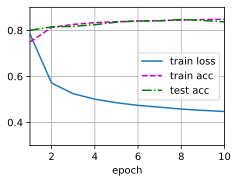

In [30]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

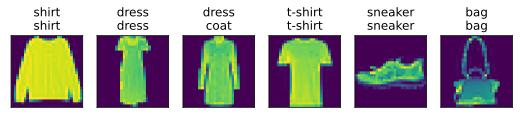

In [31]:
def predict_ch3(net, test_iter, n=6):
    for X, y in test_iter:
        break  # 仅拿出一批六个数据
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])


predict_ch3(net, test_iter)

In [33]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [34]:
from torch import nn

# Softmax回归的输出是一个全连接层
# PyTorch不会隐式地调整输入的形状
# 因此，我们定义了展平层(flatten)在线性层前调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

In [35]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)  # 方差为0.01


net.apply(init_weights)
print(net.apply(init_weights))  # net网络的参数用的是init_weights初始化参数

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [36]:
# 在交叉熵损失函数中传递未归一化的预测，并同时计算softmax及其对数
loss = nn.CrossEntropyLoss()
# 使用学习率为0.1的小批量随即梯度下降作为优化算法
trainer = torch.optim.SGD(net.parameters(),lr=0.1)

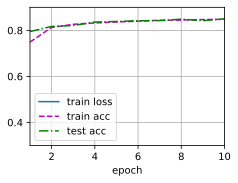

In [37]:
num_epochs = 10
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)